In [1]:
import pandas as pd

from sklearn.linear_model import Ridge

import numpy as np

from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn import metrics
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
data_df=pd.read_csv('filtered_historical_data.csv')

In [5]:
print(data_df.columns)

Index(['Unnamed: 0', 'market_id', 'created_at', 'actual_delivery_time',
       'store_id', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration', 'delivery_time(sec)',
       'delivery_time'],
      dtype='object')


In [36]:
#error display function
def run_error_result(actual,forecast,name):
    def mae(actual,forecast):
        result = 0 
        for a,f in zip(actual,forecast):
            result = result+abs(a-f)
        return result/len(forecast)

    def mape(actual, forecast): 
        result = 0 
        for a,f in zip(actual,forecast):
            result = result+ abs(a-f)/a
        return result/len(forecast)
    
    def rmse(actual, forecast): 
        rmse = np.sqrt(mean_squared_error(actual, forecast))
        return rmse
    
    return pd.DataFrame({'MAE':[mae(actual, forecast)],'MAPE': [mape(actual,forecast)],'RMSE': [rmse(actual,forecast)]},index=pd.Series([name]))

In [25]:
features=['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders','estimated_store_to_consumer_driving_duration']
X = data_df[features]
y=  data_df[['delivery_time(sec)']]


# Linear Regression

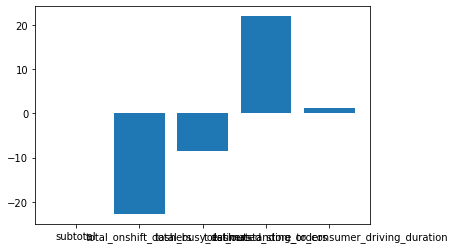

<bound method BaseEstimator.get_params of LinearRegression()>


In [30]:
#Data partitioning into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.40, random_state=100)  

#fit LR model
model = LinearRegression().fit(X_train, y_train)    
# get feature weights
weights = model.coef_
# print(weights)
# plot feature weights
plt.bar(features, weights[0])
plt.show()
print(model.get_params)


In [41]:
## predict test set  (out-sample)
y_val_pred = model.predict(X_val)
## predict train set  (in-sample)
y_train_pred = model.predict(X_train)


print("Train {}" .format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Validation {}" .format(np.sqrt(mean_squared_error(y_val, y_val_pred))))
print(run_error_result(y_val, y_val_pred,'Validation sample'))
print(run_error_result(y_train, y_train_pred,'Train sample'))

Train 1076.4577339869418
Validation 1037.1770306164701


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')